In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
#%%script false --no-raise-error
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
%config InLineBackend.figure_format = 'retina'
%config InLineBackend.savefig_format = 'pdf'
print('Retina screen activated')

Retina screen activated


In [3]:
flows_noreg = np.load('results_dict_predict_2024/results_results_noreg/weights.npy')
mean_flow_noreg = np.mean(flows_noreg, axis=0)
np.save('results_dict_predict_2024/results_results_noreg/mean_weights.npy', mean_flow_noreg)
mean_flow_noreg = mean_flow_noreg.T

In [4]:
flows_reg = np.load('results_dict_predict_2024/results_results_reg/weights.npy')
mean_flow_reg = np.mean(flows_reg, axis=0)
np.save('results_dict_predict_2024/results_results_reg/mean_weights.npy', mean_flow_reg)
mean_flow_reg = mean_flow_reg.T

In [5]:
dates = np.load('results_dict_predict_2024/dates_2024.npy')
dates = dates[63:71]

In [6]:
flows_noreg = flows_noreg[63:71]
flows_reg = flows_reg[63:71]
flows_noreg.shape, flows_reg.shape

((8, 23, 46), (8, 23, 46))

In [7]:
flows_noreg_list = [flow.T for flow in flows_noreg]
flows_reg_list = [flow.T for flow in flows_reg]

flows_noreg = np.array(flows_noreg_list)
flows_reg = np.array(flows_reg_list)

flows_noreg.shape, flows_reg.shape

((8, 46, 23), (8, 46, 23))

In [8]:
distances_noreg = np.zeros((flows_noreg.shape[1], flows_noreg.shape[0]))
distances_reg = np.zeros((flows_reg.shape[1], flows_reg.shape[0]))

for i in range(distances_noreg.shape[0]): #46
    for j in range(distances_noreg.shape[1]): #8
        distances_noreg[i, j] = cosine(flows_noreg[j, i], mean_flow_noreg[i])

for i in range(distances_reg.shape[0]):
    for j in range(distances_reg.shape[1]):
        distances_reg[i, j] = cosine(flows_reg[j, i], mean_flow_reg[i])


/Users/antoniomendez/anaconda3/envs/myenv/lib/python3.12/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


In [9]:
indexes = []
for i in range(len(distances_noreg)):
    if not np.isnan(distances_noreg[i]).any():
        print('noreg:', i, distances_noreg[i])

    if not np.isnan(distances_reg[i]).any():
        print('reg:', i, distances_reg[i])
        indexes.append(i)


noreg: 5 [0.02533162 0.01452595 0.03327811 0.04775059 0.01552969 0.02383852
 0.01639986 0.01398557]
reg: 5 [0.04858148 0.02039725 0.11435366 0.01512748 0.0229609  0.03842884
 0.02064276 0.00323719]
noreg: 6 [0.01396638 0.00737357 0.06327951 0.0071249  0.00505108 0.00433266
 0.0116123  0.01022053]
reg: 6 [0.01410085 0.00999141 0.0225932  0.00480539 0.00095987 0.00423026
 0.00227416 0.00653607]
noreg: 7 [0.05306953 0.0190025  0.19868493 0.07341325 0.03048074 0.07652873
 0.07835954 0.05201596]
reg: 7 [0.09441429 0.03012544 0.30673879 0.07175511 0.02646083 0.13807434
 0.06753969 0.0955779 ]
noreg: 9 [0.08625519 0.02873802 0.06852454 0.18864274 0.04643404 0.01131719
 0.23822796 0.12824976]
reg: 9 [0.23356843 0.0359264  0.11160982 0.16366082 0.03166103 0.02756739
 0.24002361 0.1697287 ]
noreg: 10 [0.02597535 0.00724691 0.01375771 0.00911874 0.00681186 0.0085007
 0.00982422 0.00357115]
reg: 10 [0.03715998 0.00496197 0.01410174 0.01176184 0.00993007 0.01408726
 0.00307506 0.00754786]
noreg: 11

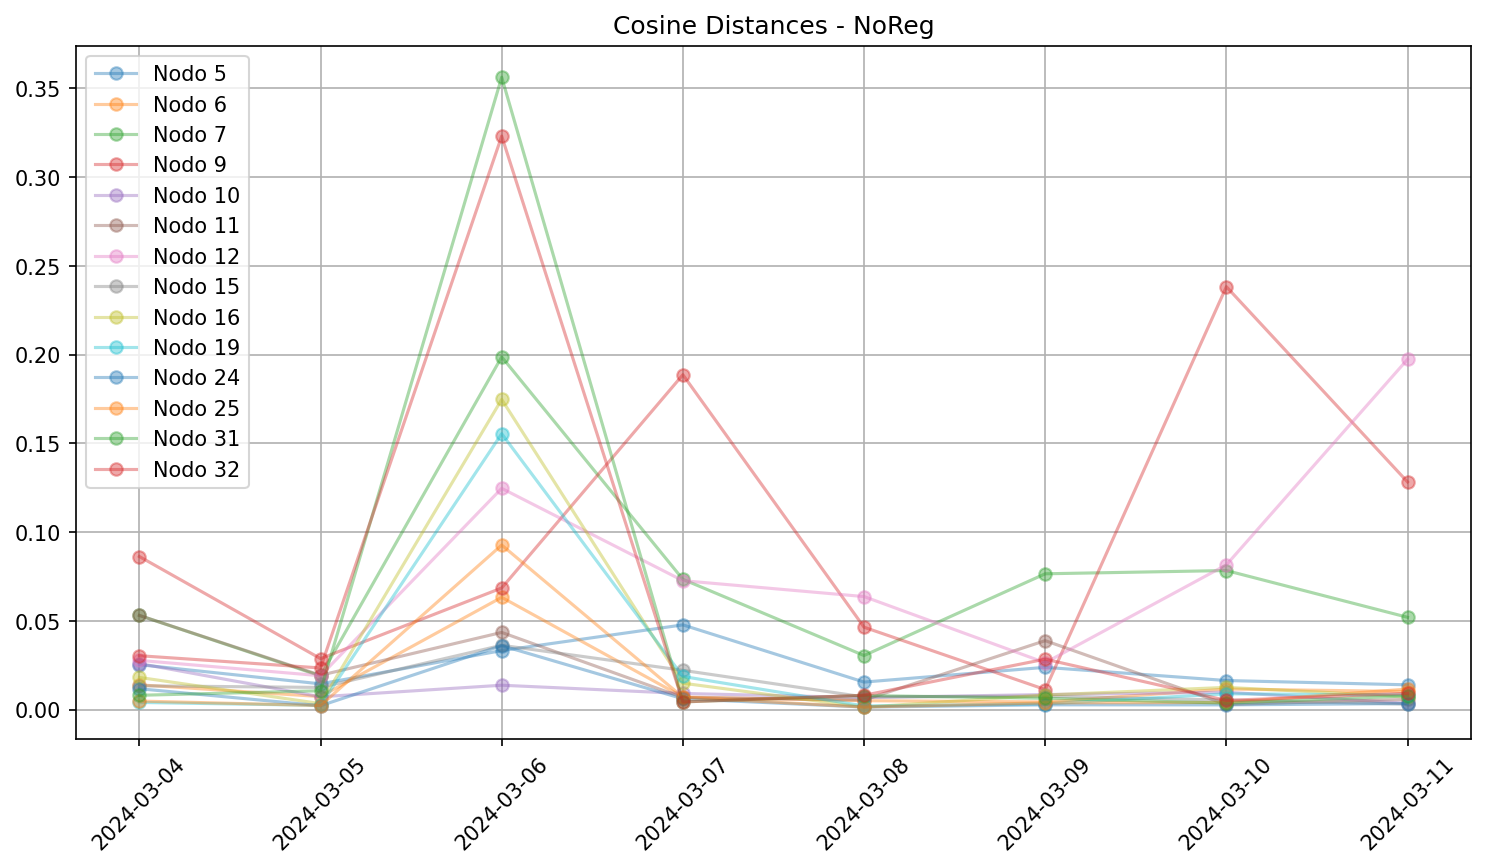

In [10]:
plt.figure(figsize=(12, 6))
for i in indexes:
    plt.plot(distances_noreg[i], label=f'Nodo {i}', marker='o', alpha=0.4)
plt.grid()
plt.legend()
plt.title('Cosine Distances - NoReg')
plt.xticks(ticks=range(len(dates)), labels=dates, rotation=45)
plt.show()

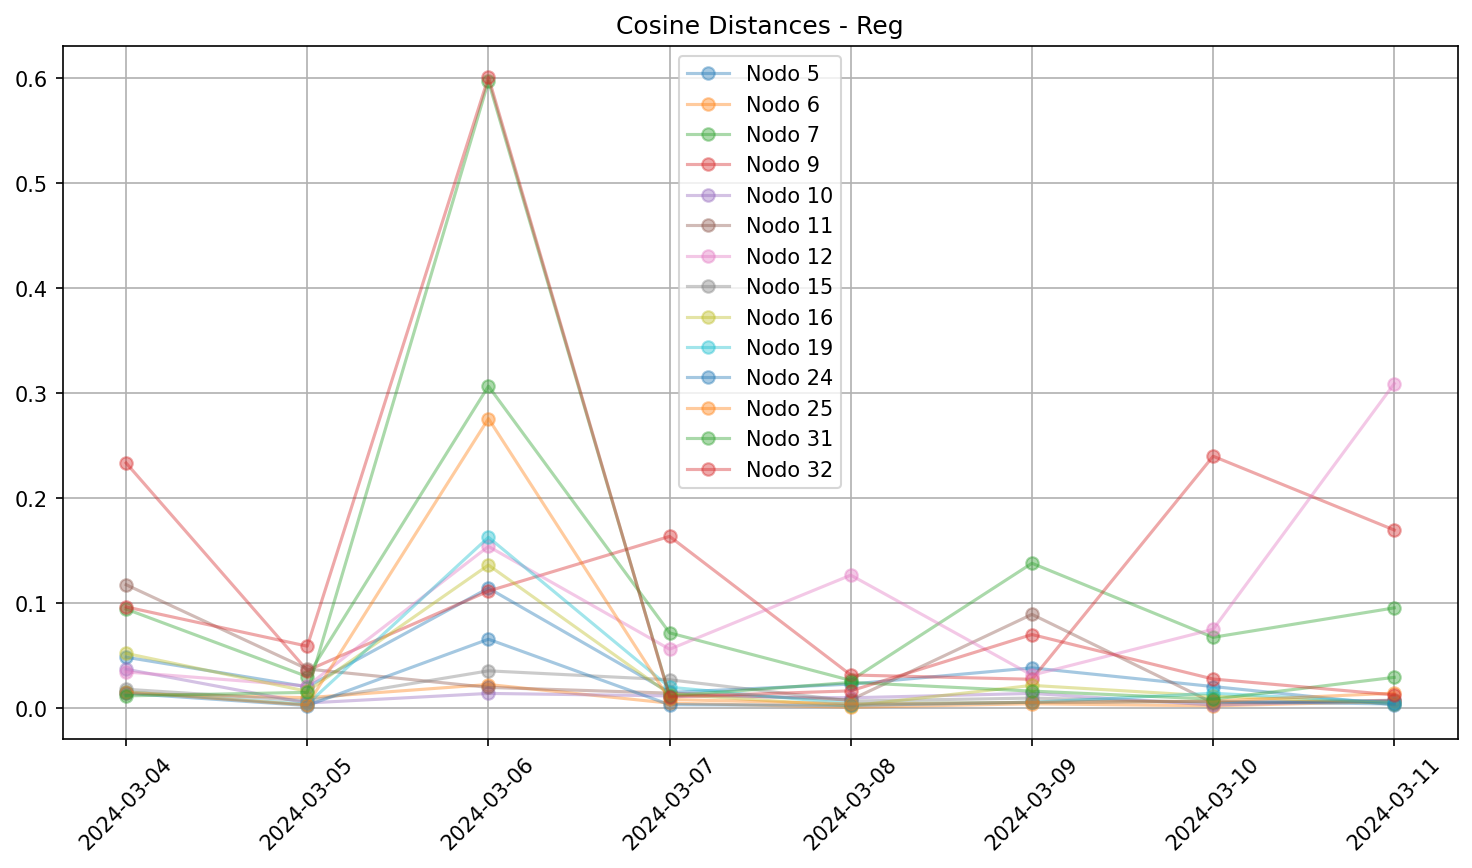

In [11]:
plt.figure(figsize=(12, 6))
for i in indexes:
    plt.plot(distances_reg[i], label=f'Nodo {i}', marker='o', alpha=0.4)
plt.grid()
plt.legend()
plt.title('Cosine Distances - Reg')
plt.xticks(ticks=range(len(dates)), labels=dates, rotation=45)
plt.show()

In [14]:
dates_2020 = np.load('vector_files/dates_2020.npy')
for i in range(len(dates_2020)):
    if dates_2020[i] == '2020-02-20' or dates_2020[i] == '2020-04-20':
        print(i)

50
110


In [16]:
dates_2020 = dates_2020[50:111]
dates_2020

array(['2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
       '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
       '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20'], dtype='<U10')

In [15]:
dates_2020 = np.load('vector_files/dates_2020_mibici.npy')
for i in range(len(dates_2020)):
    if dates_2020[i] == '2020-02-20' or dates_2020[i] == '2020-04-20':
        print(i)

50
110
